Note: We had a problem with imblearn package in our jupyter notebook. So, the final version of the code was run on GooGle Colab. 

When you run the code in the Jupyter notebook you may find the following error, please click OK and you can run the entire notebook flawlessly. 

Notebook validation failed: {'type': 'string'} is not valid under any of the given schemas:
{
 "type": "string"
}

Cheers!

__Problem Statement:__

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

Build models to predict churn. The predictive model that you’re going to build will serve two purposes:

It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

__Its a 'Binary Classification' use case__

### Step 1: Importing Data

In [205]:
# Code to Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas and NumPy
import pandas as pd, numpy as np

#set pandas option to display all the rows/columns of a dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [206]:
# Importing telecom dataset
telecom=pd.read_csv("telecom_churn_data.csv")
# Show sample data
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

### Step 2: Inspecting the Dataframe

In [207]:
telecom.shape

(99999, 226)

In [208]:
telecom.describe([0.25,0.50,0.75,0.99])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [209]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [210]:
# Check if mobile_number is unique
telecom.mobile_number.is_unique

True

__Observation:__
    
    mobile_number is unique

In [211]:
# To find list of field with Null values in number of rows
telecom.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [212]:
# To find list of field with Null %
round(100*(telecom.isnull().sum()/len(telecom.index)),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

### Step 3: Data Preparation

_Filter high-value customers_

High-value customers: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [213]:
# Average of total recharge amount for June(6) & July(7)
telecom['good_phase_recharge'] = (telecom['total_rech_amt_6'] + telecom['total_rech_amt_7'])/2.0

In [214]:
telecom['good_phase_recharge'].head()

0    307.0
1    229.0
2    241.5
3    270.0
4    273.0
Name: good_phase_recharge, dtype: float64

In [215]:
telecom.shape

(99999, 227)

In [216]:
seventy_percentile = int(telecom['good_phase_recharge'].quantile(.70))
telecom = telecom[(telecom.good_phase_recharge > seventy_percentile)]
telecom.shape

(30011, 227)

In [217]:
# drop the average column
telecom.drop(['good_phase_recharge'], axis=1, inplace=True)

__Observation:__

No. of High value customers : 30011

In [218]:
# Tagging churners and removing attributes of the churn phase

def is_churn(x):
    if ((x.total_ic_mou_9 == 0) & (x.total_og_mou_9 == 0) & (x.vol_2g_mb_9 == 0) & (x.vol_3g_mb_9 == 0)):
        return 1
    else:
        return 0
telecom['churn'] = telecom.apply(is_churn, axis=1)

telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.

In [219]:
telecom.shape

(30011, 227)

In [220]:
# count of churned vs non-churned customers
telecom['churn'].value_counts()

0    27418
1     2593
Name: churn, dtype: int64

In [221]:
# Calculating churn rate
print('Churn Rate : {0}%'.format(round(((sum(telecom['churn'])/len(telecom['churn']))*100),2)))

Churn Rate : 8.64%


In [222]:
# Calculating imbalance in data
imbalance = (sum(telecom['churn'] != 0)/sum(telecom['churn'] == 0))*100
imbalance

9.457290830841053

__Observation:__

Churn rate is less than 10% indicating that the class imbalance needs to be handled.

_Removing Churn Phase data:_

In [223]:
churn_phase_columns =  telecom.columns[telecom.columns.str.contains('_9')]
churn_phase_columns

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user

In [224]:
# dropping all columns of the churn phase
telecom.drop(churn_phase_columns,axis=1,inplace=True)
telecom.shape

(30011, 173)

In [225]:
# dropping sep_vbc_3g column of the churn phase
telecom.drop(['sep_vbc_3g'], axis = 1, inplace = True)
telecom.shape

(30011, 172)

In [226]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.5

In [227]:
# Check on Null % again
round(100*(telecom.isnull().sum()/len(telecom.index)),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.38
std_og_t2o_mou               0.38
loc_ic_t2o_mou               0.38
last_date_of_month_6         0.00
last_date_of_month_7         0.10
last_date_of_month_8         0.52
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  1.05
onnet_mou_7                  1.01
onnet_mou_8                  3.13
offnet_mou_6                 1.05
offnet_mou_7                 1.01
offnet_mou_8                 3.13
roam_ic_mou_6                1.05
roam_ic_mou_7                1.01
roam_ic_mou_8                3.13
roam_og_mou_6                1.05
roam_og_mou_7                1.01
roam_og_mou_8                3.13
loc_og_t2t_mou_6             1.05
loc_og_t2t_mou_7             1.01
loc_og_t2t_mou_8             3.13
loc_og_t2m_mou_6             1.05
loc_og_t2m_mou_7             1.01
loc_og_t2m_mou_8             3.13
loc_og_t2f_mou

In [228]:
# Dropping columns where % of Null is greater than 50.
columns=telecom.columns

for field in columns:
    if((100*(telecom[field].isnull().sum()/len(telecom.index))) >= 50):
        telecom.drop(field, 1, inplace = True)
        
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,6/25/2014,7/31/2014,8/30/2014,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015

In [229]:
telecom.shape

(30011, 142)

In [230]:
# A Check on unwanted columns
# Finding the unique count
for col in telecom.columns:
    print(col, len(telecom[col].unique()))

mobile_number 30011
circle_id 1
loc_og_t2o_mou 2
std_og_t2o_mou 2
loc_ic_t2o_mou 2
last_date_of_month_6 1
last_date_of_month_7 2
last_date_of_month_8 2
arpu_6 29261
arpu_7 29260
arpu_8 28405
onnet_mou_6 18814
onnet_mou_7 18939
onnet_mou_8 17605
offnet_mou_6 22455
offnet_mou_7 22651
offnet_mou_8 21514
roam_ic_mou_6 4339
roam_ic_mou_7 3650
roam_ic_mou_8 3656
roam_og_mou_6 5175
roam_og_mou_7 4432
roam_og_mou_8 4383
loc_og_t2t_mou_6 11152
loc_og_t2t_mou_7 11155
loc_og_t2t_mou_8 10773
loc_og_t2m_mou_6 16748
loc_og_t2m_mou_7 16873
loc_og_t2m_mou_8 16166
loc_og_t2f_mou_6 3253
loc_og_t2f_mou_7 3268
loc_og_t2f_mou_8 3125
loc_og_t2c_mou_6 1659
loc_og_t2c_mou_7 1751
loc_og_t2c_mou_8 1731
loc_og_mou_6 19692
loc_og_mou_7 19881
loc_og_mou_8 18886
std_og_t2t_mou_6 12778
std_og_t2t_mou_7 12984
std_og_t2t_mou_8 11782
std_og_t2m_mou_6 14519
std_og_t2m_mou_7 14590
std_og_t2m_mou_8 13327
std_og_t2f_mou_6 1774
std_og_t2f_mou_7 1715
std_og_t2f_mou_8 1628
std_og_t2c_mou_6 2
std_og_t2c_mou_7 2
std_og_t2c_mou_

__Observation:__

_Unique-ID columns:_

mobile_number,  Less Info columns,  circle_id,  last_date_of_month_6,  last_date_of_month_7,  last_date_of_month_8,
loc_og_t2o_mou,  std_og_t2o_mou,  loc_ic_t2o_mou,  std_og_t2c_mou_6,  std_og_t2c_mou_7,  std_og_t2c_mou_8,  std_ic_t2o_mou_6,
std_ic_t2o_mou_7,  std_ic_t2o_mou_8,  date_of_last_rech_6,  date_of_last_rech_7 &  date_of_last_rech_8

In [231]:
#Dropping columns with less unique ID's as they are not needed and does not have decisive power
cols_to_drop = ['std_og_t2c_mou_6', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_8', 'std_og_t2c_mou_8', 'std_og_t2c_mou_7', 
                'std_ic_t2o_mou_7', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'circle_id', 'mobile_number',
                'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6',
               'date_of_last_rech_7', 'date_of_last_rech_8']

telecom.drop(cols_to_drop,axis=1,inplace=True)
telecom.shape

(30011, 125)

In [232]:
#Finding Null's % in the dataframe
round(100*(telecom.isnull().sum()/len(telecom.index)),2)

arpu_6                0.00
arpu_7                0.00
arpu_8                0.00
onnet_mou_6           1.05
onnet_mou_7           1.01
onnet_mou_8           3.13
offnet_mou_6          1.05
offnet_mou_7          1.01
offnet_mou_8          3.13
roam_ic_mou_6         1.05
roam_ic_mou_7         1.01
roam_ic_mou_8         3.13
roam_og_mou_6         1.05
roam_og_mou_7         1.01
roam_og_mou_8         3.13
loc_og_t2t_mou_6      1.05
loc_og_t2t_mou_7      1.01
loc_og_t2t_mou_8      3.13
loc_og_t2m_mou_6      1.05
loc_og_t2m_mou_7      1.01
loc_og_t2m_mou_8      3.13
loc_og_t2f_mou_6      1.05
loc_og_t2f_mou_7      1.01
loc_og_t2f_mou_8      3.13
loc_og_t2c_mou_6      1.05
loc_og_t2c_mou_7      1.01
loc_og_t2c_mou_8      3.13
loc_og_mou_6          1.05
loc_og_mou_7          1.01
loc_og_mou_8          3.13
std_og_t2t_mou_6      1.05
std_og_t2t_mou_7      1.01
std_og_t2t_mou_8      3.13
std_og_t2m_mou_6      1.05
std_og_t2m_mou_7      1.01
std_og_t2m_mou_8      3.13
std_og_t2f_mou_6      1.05
s

In [233]:
#Finding columns which have Null's and storing it
zero_impute=telecom.columns[telecom.isnull().any()]
zero_impute

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'lo

In [234]:
#Imputing the columns with Nan as Zero
telecom[zero_impute] = telecom[zero_impute].apply(lambda x: x.fillna(0))

In [235]:
round(100*(telecom.isnull().sum()/len(telecom.index)),2)

arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_mou_8      0.0
std_og_t2f_mou_6      0.0
std_og_t2f_mou_7      0.0
std_og_t2f_m

In [236]:
telecom.head(5)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,30.89,67.09,21

## Step 3 : EDA

### Univariate Analysis

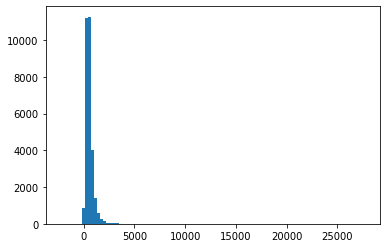

In [237]:
#Histogram plot for arpu_6 (Average revenue per user) field
plt.hist(telecom['arpu_6'], bins = 100)
plt.show()

__Observation:__ 

ARPU field for 6th month, seems ot be concentrating at around 1000

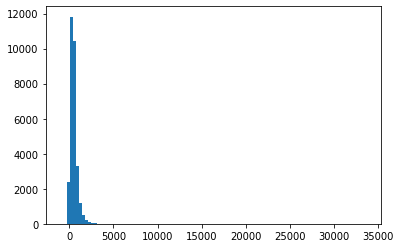

In [238]:
#Histogram plot for arpu_8 (Average revenue per user) field
plt.hist(telecom['arpu_8'], bins = 100)
plt.show()

__Observation:__ 

ARPU field for 8th month, seems to be concentrating at around 1000 as 6th month. So it seems like it is showing the same pattern across months.

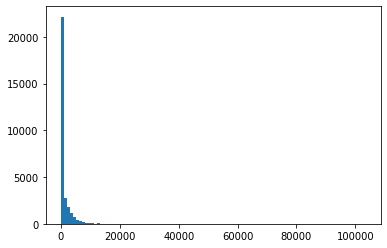

In [239]:
#Histogram plot for arpu_8 (Average revenue per user) field
telecom['total_vol_2g_3g_mb']=telecom['vol_2g_mb_6']+telecom['vol_2g_mb_7']+telecom['vol_2g_mb_8']+telecom['vol_3g_mb_6']+telecom['vol_3g_mb_7']+telecom['vol_3g_mb_8']
plt.hist(telecom['total_vol_2g_3g_mb'], bins = 100)
plt.show()

__Observation:__ 

It seems like most of the data users are between 0 and 1000 GB and some users it seems like to be more than normal and limit

In [240]:
# A look at the Premium/Royal customers in terms of years of network association
telecom['aon_yrs']=telecom['aon']/365.0
telecom.loc[telecom['aon_yrs']>=8, 'royal_customer']='True'
telecom.loc[telecom['aon_yrs']<8, 'royal_customer']='False'

In [241]:
royal=round(telecom[telecom['royal_customer']=='True']['aon_yrs'])
royal

24        8.0
57        9.0
60        9.0
87        9.0
92        9.0
         ... 
99882    10.0
99893     8.0
99899     9.0
99924     9.0
99974     8.0
Name: aon_yrs, Length: 2682, dtype: float64

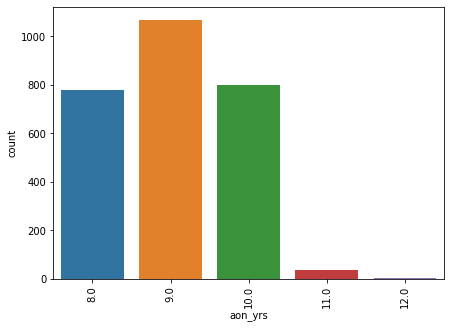

In [242]:
plt.figure(figsize=(7,5))
s1=sns.countplot(royal)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

__Observation:__ 

From above, it seems like around 3000 customers are classified as royal customers and if they fall under churn category, then we need to give extra attention to retain customer

In [243]:
#Deriving total of ARPU value for each customer to get quarterly ARPU values.
#By considering Average revenue of 4000, we can determine the count of customers fall under particular revenue as high profile or not
telecom['arpu_total']=telecom['arpu_6']+telecom['arpu_7']+telecom['arpu_8']

In [244]:
np.average(telecom['arpu_total'])

1711.2772633367765

In [245]:
telecom.loc[telecom['arpu_total']>=1711, 'high_profile']='True'
telecom.loc[telecom['arpu_total']<1711, 'high_profile']='False'

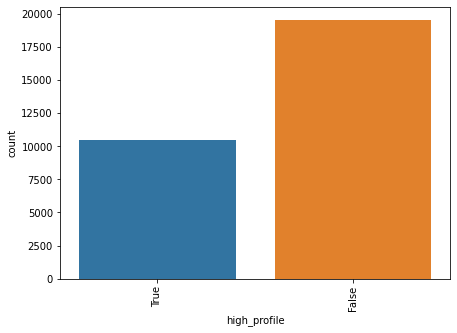

In [246]:
plt.figure(figsize=(7,5))
s1=sns.countplot(telecom['high_profile'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

__Observation:__ 

From above plot, it seems like based on average revenue, if we split the field, then there exists 10000 customers who are providing profit above 1711. And, 20000 customers are not belongs to high profile.

### Bi Variate Analysis

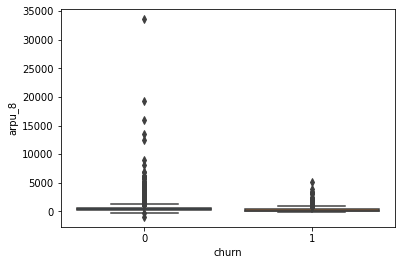

In [247]:
#arpu_8 and churn relationship based on Box plot
sns.boxplot(y=telecom['arpu_8'],x=telecom['churn'])
plt.show()

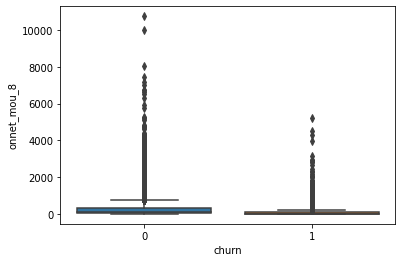

In [248]:
#onnet_mou_8 and churn relationship based on Box plot
sns.boxplot(y=telecom['onnet_mou_8'],x=telecom['churn'])
plt.show()

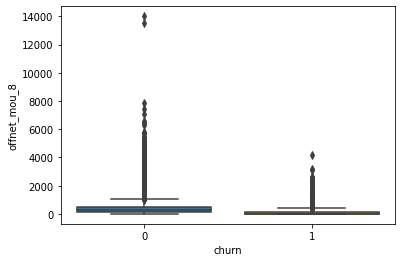

In [249]:
#offnet_mou_8 and churn relationship based on Box plot
sns.boxplot(y=telecom['offnet_mou_8'],x=telecom['churn'])
plt.show()

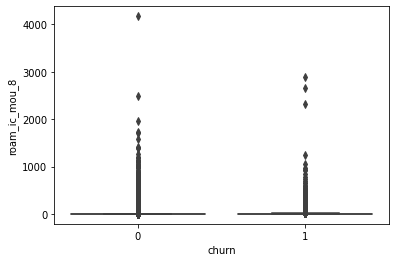

In [250]:
#roam_ic_mou_8 and churn relationship based on Box plot
sns.boxplot(y=telecom['roam_ic_mou_8'],x=telecom['churn'])
plt.show()

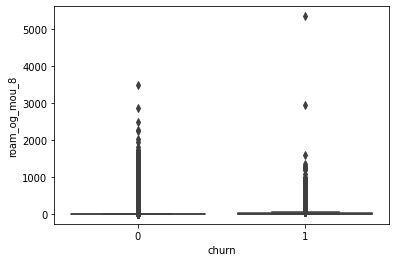

In [251]:
#roam_og_mou_8 and churn relationship based on Box plot
sns.boxplot(y=telecom['roam_og_mou_8'],x=telecom['churn'])
plt.show()

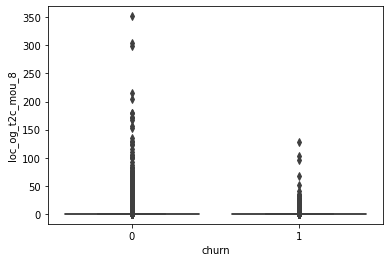

In [252]:
#loc_og_t2c_mou_8 and churn relationship based on Box plot
sns.boxplot(y=telecom['loc_og_t2c_mou_8'],x=telecom['churn'])
plt.show()

__Observation:__ 

Three seems to be outlier in each and every field but all the outliers are valid as the usage from user will vary according to user

In [253]:
cor=telecom.corr()
cor

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,total_vol_2g_3g_mb,aon_yrs,arpu_total
arpu_6,1.000000,0.631581,0.570936,0.291288,0.142431,0.116476,0.459309,0.257895,0.209238,0.109162,0.069882,0.077812,0.176963,0.122399,0.107916,0.129194,0.086589,0.085121,0.276915,0.175359,0.154181,0.112236,0.082610,0.071729,0.045273,0.009153,0.004787,0.269509,0.174449,0.157259,0.234329,0.100276,0.074959,0.262791,0.121425,0.085729,0.051461,0.037400,0.026049,0.338514,0.151553,0.108352,0.481277,0.432633,0.425466,0.113180,0.050398,0.023539,0.086704,0.023286,0.014705,0.502950,0.267321,0.210000,0.066606,0.039024,0.040441,0.151346,0.104704,0.085222,0.041512,0.025531,0.024688,0.147276,0.097532,0.084259,0.074004,0.043102,0.040377,0.077415,0.041312,0.038892,0.024695,0.022107,0.015204,0.100740,0.056812,0.051990,0.188549,0.119397,0.104696,0.011835,-0.028108,-0.014938,0.114075,0.058845,0.058879,0.014150,0.023799,0.009025,0.330964,0.101415,0.086661,0.941256,0.608101,0.565462,0.313721,0.230572,0.257768,0.239042,0.168345,0.172094,0.030598,-0.001677,0.002541,0.216141,0.142724,0.147727,0.017231,-0.019382,-0.009707,0.001376,-0.026064,-0.024538,0.224394,0.126916,0.143128,0.046507,0.028326,0.023618,-0.006226,0.122959,0.123912,0.173104,0.063513,0.180692,-0.006226,0.830239
arpu_7,0.631581,1.000000,0.740811,0.140501,0.269474,0.217865,0.274695,0.440144,0.341654,0.071475,0.081132,0.083953,0.108474,0.161861,0.137825,0.063639,0.121219,0.100128,0.149115,0.244915,0.199307,0.083753,0.112949,0.091904,0.006127,0.040592,0.031311,0.142821,0.243687,0.196898,0.110402,0.220106,0.177942,0.148375,0.269947,0.201927,0.034626,0.057390,0.036018,0.176447,0.334490,0.255652,0.427520,0.522933,0.464600,0.055156,0.100860,0.053832,0.017109,0.025625,0.017318,0.275584,0.483248,0.367080,0.023247,0.056932,0.055511,0.071654,0.133962,0.111328,0.019536,0.034368,0.033961,0.065505,0.128767,0.111675,0.041783,0.071038,0.075658,0.041790,0.080258,0.071257,0.022982,0.032474,0.026815,0.056780,0.101722,0.095968,0.090285,0.172867,0.147917,-0.015998,-0.004635,-0.009431,0.060793,0.100210,0.070617,0.003784,0.025246,0.014955,0.124813,0.289468,0.205353,0.638062,0.937114,0.737607,0.240686,0.340720,0.357239,0.224893,0.261484,0.231091,0.003028,0.033532,0.026157,0.135447,0.230599,0.180304,-0.018368,0.023572,0.0022

In [254]:
cor['churn'].sort_values(ascending=True)

total_ic_mou_8       -0.193407
loc_ic_mou_8         -0.185884
arpu_8               -0.182294
total_rech_amt_8     -0.181299
total_og_mou_8       -0.178737
loc_og_mou_8         -0.175448
loc_og_t2m_mou_8     -0.174892
loc_ic_t2m_mou_8     -0.172744
total_rech_num_8     -0.151955
offnet_mou_8         -0.145272
max_rech_amt_8       -0.140177
last_day_rch_amt_8   -0.129553
aon_yrs              -0.124502
aon                  -0.124502
loc_og_mou_7         -0.114817
loc_og_t2m_mou_7     -0.111838
loc_ic_mou_7         -0.109608
loc_ic_t2t_mou_8     -0.102153
total_ic_mou_7       -0.101110
loc_ic_t2m_mou_7     -0.100991
onnet_mou_8          -0.097004
loc_og_t2t_mou_8     -0.092254
std_og_mou_8         -0.092212
monthly_2g_8         -0.085232
loc_ic_t2f_mou_8     -0.084124
loc_og_t2f_mou_8     -0.078018
vol_3g_mb_8          -0.076261
aug_vbc_3g           -0.076260
loc_og_mou_6         -0.076214
loc_og_t2m_mou_6     -0.076103
monthly_3g_8         -0.073471
loc_ic_mou_6         -0.073080
std_ic_m

__Observation:__ 

From above,it seems like none of the fields are directly related with Churn of customer. So by using Correlation, we are not able to come to conclusion of important field.

In [255]:
## Dropping Derived columns
telecom.drop(['total_vol_2g_3g_mb'], axis = 1, inplace = True)
telecom.drop(['aon_yrs'], axis = 1, inplace = True)
telecom.drop(['royal_customer'], axis = 1, inplace = True)
telecom.drop(['arpu_total'], axis = 1, inplace = True)
telecom.drop(['high_profile'], axis = 1, inplace = True)
telecom.shape

(30011, 125)

## Step 4 : Model Building

In [256]:
# Model selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression

# Model hyper parameter tuning
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import os
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [257]:
X = telecom.drop(columns=['churn'], axis=1)
Y = telecom[['churn']]

scaler = StandardScaler()
_columns = X.columns
X[_columns] = scaler.fit_transform(X)
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
7,1.088501,1.643402,5.356252,-0.516951,-0.518218,-0.461492,0.075432,0.294410,-0.102856,-0.014943,0.261694,0.246593,-0.047075,-0.096463,0.156158,-0.182780,-0.259340,-0.199644,0.509141,1.105478,-0.022614,2.433281,2.126868,2.311395,-0.227481,-0.201203,-0.231531,0.366367,0.664667,-0.014853,-0.452645,-0.412479,-0.390673,-0.370530,-0.414792,-0.312970,0.373216,1.351720,1.272653,-0.550712,-0.533682,-0.447443,-0.049315,-0.044442,0.178163,-0.076062,-0.321932,-0.016826,-0.303560,-0.017361,-0.017809,-0.301611,-0.145804,-0.398872,-0.066873,-0.227426,-0.248086,0.261022,0.276523,-0.149471,2.980047,1.716940,0.567870,0.587952,0.341040,-0.150605,0.261988,-0.059791,0.211764,0.587880,0.883824,1.053065,2.474666,1.523431,0.963485,0.921106,0.802484,1.034095,0.883137,0.657827,0.369969,0.737474,-0.099296,-0.237277,-0.135250,0.028183,0.265446,1.040354,0.890102,1.078557,-0.746205,-0.719750,-0.340280,1.636578,0.167286,5.025429,8.062871,3.383998,8.210351,-0.731873,-0.745945,4.704367,-0.284238,-0.278858,-0.257772,-0.298313,-0.325002,-0.314057,-0.333384,-0.338827,-0.319253,-0.294406,-0.308975,-0.329433,-0.302821,-0.298404,-0.297129,-0.157526,-0.154974,-0.144058,-0.473793,-0.183623,-0.283682,-0.263319
8,-0.471101,-0.209364,-0.807505,0.255347,0.096906,-0.498379,-0.686967,-0.705616,-0.499583,-0.219993,-0.177217,-0.177815,-0.247297,-0.225033,-0.202077,0.854774,0.491118,-0.318041,-0.401073,-0.459839,-0.498390,-0.307932,-0.314198,-0.321188,-0.227481,-0.201203,0.735019,0.250386,0.010836,-0.540726,-0.178646,-0.155210,-0.364894,-0.458079,-0.464389,-0.249262,-0.161414,-0.152375,-0.152966,-0.436285,-0.426471,-0.414273,-0.049315,-0.048388,-0.045303,-0.317724,-0.321932,0.146106,-0.303560,-0.017361,-0.017809,-0.270067,-0.405023,-0.659232,-0.283080,-0.361426,-0.421497,-0.459617,-0.669162,-0.636562,-0.340321,-0.333687,-0.336431,-0.519623,-0.709479,-0.711609,-0.205797,-0.192629,-0.206422,-0.094824,-0.277843,-0.282837,-0.144244,-0.145919,-0.132266,-0.204218,-0.326511,-0.336408,-0.563893,-0.774751,-0.773960,-0.343498,-0.099296,-0.237277,-0.165878,-0.160541,-0.156162,-0.084995,-0.095863,-0.096027,0.720779,0.945985,0.398240,-0.482770,-0.168933,-0.820255,-0.466021,-0.119317,-0.769798,-0.381646,-0.745945,-0.589663,-0.284238,0.991087,

In [258]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
x_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
4715,-0.578206,-0.235089,-0.301038,0.087453,0.540580,0.335459,-0.558870,-0.725245,-0.600823,-0.219993,-0.177217,-0.177815,-0.247297,-0.225033,-0.202077,-0.395493,-0.372669,-0.334912,-0.718111,-0.745027,-0.706728,-0.307932,-0.314198,-0.321188,1.087621,-0.201203,-0.231531,-0.737589,-0.742135,-0.685051,0.355268,0.844714,0.593579,-0.190789,-0.345992,-0.223251,-0.161414,-0.152375,-0.152966,0.106619,0.326436,0.241073,-0.049315,-0.048388,-0.045303,1.413111,-0.007608,-0.172768,-0.30356,-0.017361,-0.017809,-0.291147,-0.106946,-0.158293,-0.419927,-0.375950,-0.411413,-0.677187,-0.635757,-0.686741,-0.340321,-0.333687,-0.336431,-0.743472,-0.693946,-0.741931,0.696803,0.574876,0.654248,0.093436,0.254080,0.736847,-0.144244,-0.145919,-0.132266,0.437838,0.486484,0.867668,-0.507546,-0.433373,-0.328766,0.428625,-0.099296,-0.237277,-0.165878,-0.160541,-0.156162,-0.084995,-0.095863,-0.096027,0.720779,1.258310,1.558772,-0.607001,-0.254322,-0.271910,-0.809467,-0.582019,-0.653925,-0.731873,-0.604247,-0.589663,-0.284238,0.474548,-0.257772,-0.298313,-0.325002,-0.314057,-0.333384,-0.338827,-0.319253,-0.294406,0.217222,-0.329433,-0.302821,-0.298404,-0.297129,-0.157526,-0.154974,-0.144058,-0.934189,-0.331495,-0.331180,-0.311405
15222,-0.603710,-0.173809,-0.110633,-0.403575,-0.574552,-0.292722,-0.418788,-0.629134,-0.431497,-0.219993,-0.177217,-0.177815,-0.247297,-0.225033,-0.202077,0.065018,-0.274816,0.186990,0.043300,-0.402261,-0.244876,0.695370,1.032063,2.417727,-0.227481,-0.201203,-0.231531,0.110510,-0.377024,0.096188,-0.463140,-0.466881,-0.419963,-0.491188,-0.487315,-0.430883,-0.161414,-0.152375,-0.152966,-0.651058,-0.651560,-0.573764,-0.049315,-0.048388,-0.045303,0.004491,-0.192734,-0.146560,-0.30356,-0.017361,-0.017809,-0.538744,-0.822899,-0.471950,-0.307348,-0.350668,-0.180135,1.449234,0.339414,0.425354,1.725308,0.445050,3.503588,1.125452,0.119937,0.708147,-0.158245,-0.164880,-0.207803,-0.316721,-0.316405,-0.289010,-0.144244,-0.098140,-0.112532,-0.337170,-0.331538,-0.338891,0.831413,-0.035075,0.465213,-0.343498,-0.099296,-0.237277,-0.046783,0.001946,-0.010154,-0.084995,-0.095863,-0.096027,-0.746205,-0.511533,-0.762292,-0.755337,-0.103112,-0.258617,-0.351539,0.123051,0.203535,0.038625,0.033390,0.704586,-0

_Dimentionality reduction:_

In [259]:
pca = PCA(random_state=100, svd_solver='randomized')
pca.fit_transform(x_train)

array([[-3.24684361e+00,  1.37649566e+00, -9.52051404e-01, ...,
         6.68863897e-06, -7.20127163e-06,  4.37228490e-06],
       [ 1.23149250e+00, -3.40570445e+00, -7.07581337e-01, ...,
         1.10717420e-06, -1.16403733e-06,  1.67694870e-06],
       [ 1.93981109e+00, -1.88606830e+00, -1.19353363e+00, ...,
        -2.08943167e-06, -4.84390222e-07,  2.70343800e-07],
       ...,
       [-1.84282036e+00,  1.79912953e+00,  1.00054812e-01, ...,
         4.58611425e-06, -6.08781234e-06,  1.01042417e-05],
       [-3.46967763e+00,  2.46158833e+00, -1.23309316e+00, ...,
         9.71348763e-06, -5.33870185e-06, -1.47873517e-06],
       [ 7.54578567e+00, -3.73616883e+00, -5.17075828e+00, ...,
        -1.09954131e-06,  4.10605969e-06, -1.52182391e-06]])

In [260]:
pca.components_

array([[ 1.08035085e-01,  1.17388716e-01,  1.28207496e-01, ...,
         4.87453774e-02,  4.47934821e-02,  4.02539964e-02],
       [ 1.02965204e-01,  1.29027386e-01,  1.21134359e-01, ...,
        -5.71477638e-02, -6.23755855e-02, -5.90360443e-02],
       [ 1.35894299e-01,  1.67421408e-01,  1.65088691e-01, ...,
         2.11864511e-01,  2.19941322e-01,  2.06262826e-01],
       ...,
       [-1.29166661e-07,  3.13952376e-07,  4.27906984e-09, ...,
         4.61291332e-08,  8.86671771e-08,  1.31015151e-08],
       [-1.37470206e-07,  1.15794018e-07,  9.06478807e-08, ...,
         2.75111268e-09,  1.65283727e-08, -1.81896458e-08],
       [-2.78840787e-07, -3.29664392e-09, -2.19531814e-07, ...,
        -2.86139881e-08,  5.17719350e-08, -2.07035924e-08]])

In [261]:
colnames = list(x_train.columns)
pcs_data = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_data.head()

,PC1,PC2,Feature
0,0.108035,0.102965,arpu_6
1,0.117389,0.129027,arpu_7
2,0.128207,0.121134,arpu_8
3,0.022385,0.164262,onnet_mou_6
4,0.028984,0.194511,onnet_mou_7


In [262]:
pca.explained_variance_ratio_

array([9.74442947e-02, 8.60254252e-02, 5.51984581e-02, 4.74126923e-02,
       3.91471050e-02, 3.62398131e-02, 2.87183063e-02, 2.84572474e-02,
       2.71781516e-02, 2.56731635e-02, 2.40640565e-02, 2.29572569e-02,
       2.23866470e-02, 2.11426269e-02, 2.04785864e-02, 1.95292244e-02,
       1.77758305e-02, 1.75660375e-02, 1.71094817e-02, 1.44599304e-02,
       1.40388521e-02, 1.31196535e-02, 1.29752272e-02, 1.15747317e-02,
       1.12668332e-02, 1.05196049e-02, 9.79036922e-03, 9.51143787e-03,
       9.33524553e-03, 8.11218603e-03, 7.67788642e-03, 7.62760770e-03,
       7.44992039e-03, 7.04473927e-03, 6.90512563e-03, 6.49619095e-03,
       6.46876809e-03, 6.35311050e-03, 6.24909216e-03, 6.03940138e-03,
       5.96521306e-03, 5.91021379e-03, 5.64412202e-03, 5.18188900e-03,
       5.03767178e-03, 4.80105725e-03, 4.72815008e-03, 4.48259821e-03,
       4.40405334e-03, 4.25389911e-03, 4.09642259e-03, 3.99884635e-03,
       3.77853688e-03, 3.60612310e-03, 3.49418420e-03, 3.44941573e-03,
      

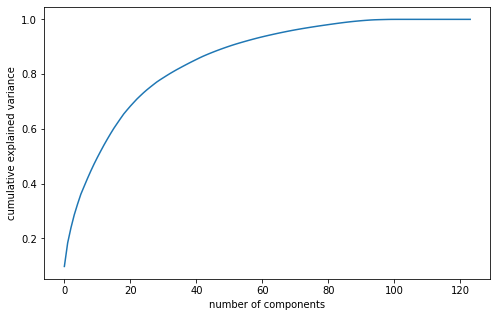

In [263]:
fig = plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

_We aim for 85 components to describe 95% of the variance in components_


In [264]:
pca_final = IncrementalPCA(n_components=85)
df_train_pca = pca_final.fit_transform(x_train)
df_train_pca.shape

(21007, 85)

In [265]:
#Correlation Matrix
corrmat = np.corrcoef(df_train_pca.transpose())
plt.figure(figsize=(30, 30))
sns.heatmap(corrmat, annot=True)

Output hidden; open in https://colab.research.google.com to view.

__Observation:__

_'NO' co-relation between features_

In [266]:
pca_test_data = pca_final.transform(x_test)
pca_test_data.shape

(9004, 85)

### Logistic regression with PCA :

In [267]:
logistic_regression = LogisticRegression()
logistic_model = logistic_regression.fit(df_train_pca, y_train)
predicted_proba = logistic_model.predict_proba(pca_test_data)[:, 1]
"{:2.2}".format(metrics.roc_auc_score(y_test, predicted_proba))

'0.9'

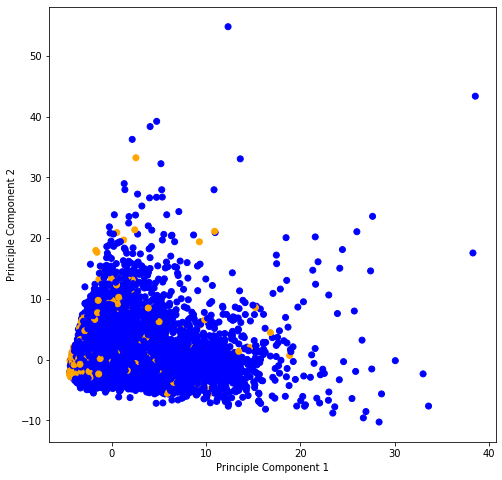

In [268]:
#Plot Principle Component 1 vs Principle Component 2

plt.figure(figsize=(8, 8))
plt.scatter(df_train_pca[:, 0],df_train_pca[:, 1],c= y_train['churn'].map({0:'blue',1:'orange'}))
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.show()

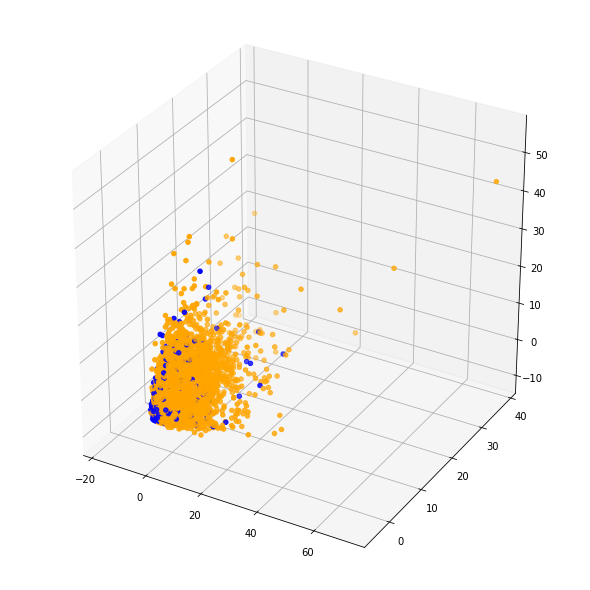

In [269]:
# 3D Plot Principle Component 1 vs Principle Component 2
fig = plt.figure(figsize=(8,8))
ax =Axes3D(fig)
ax.scatter(df_train_pca[:,2],df_train_pca[:,0],df_train_pca[:,1],c=y_train['churn'].map({0:'orange',1:'blue'}))

__Features list & variance:__

In [270]:
pca_column_frame =pcs_data.head(85)
pca_column_frame.head(10)

,PC1,PC2,Feature
0,0.108035,0.102965,arpu_6
1,0.117389,0.129027,arpu_7
2,0.128207,0.121134,arpu_8
3,0.022385,0.164262,onnet_mou_6
4,0.028984,0.194511,onnet_mou_7
5,0.041701,0.191524,onnet_mou_8
6,0.087655,0.145003,offnet_mou_6
7,0.090950,0.173339,offnet_mou_7
8,0.102876,0.160363,offnet_mou_8
9,0.007517,0.013427,roam_ic_mou_6


In [271]:
pca_column_frame['coeff'] = logistic_model.coef_[0]
pca_column_frame.sort_values(by=['coeff'])

,PC1,PC2,Feature,coeff
0,0.108035,0.102965,arpu_6,-0.616053
10,0.001886,0.005527,roam_ic_mou_7,-0.538901
53,0.099769,0.237140,total_og_mou_8,-0.480162
60,0.097932,-0.055455,loc_ic_t2f_mou_6,-0.395816
30,-0.041199,0.171835,std_og_t2t_mou_6,-0.382229
36,0.028381,-0.011988,std_og_t2f_mou_6,-0.312864
76,0.060242,0.046710,std_ic_mou_7,-0.276356
23,0.091518,-0.041089,loc_og_t2f_mou_8,-0.254362
67,0.035833,0.039224,std_ic_t2t_mou_7,-0.233105
9,0.007517,0.013427,roam_ic_mou_6,-0.224890


### Random forest classifier with PCA :

In [272]:
rfc = RandomForestClassifier(n_jobs=-1, 
                             bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=8,
                             n_estimators=60)
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [273]:
predictions = rfc.predict(pca_test_data)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96      8234
           1       0.00      0.00      0.00       770

    accuracy                           0.91      9004
   macro avg       0.46      0.50      0.48      9004
weighted avg       0.84      0.91      0.87      9004



In [274]:
accuracy_score(y_true=y_test, y_pred=predictions).round(2)

0.91

In [275]:
print(confusion_matrix(y_test,predictions))

[[8234    0]
 [ 770    0]]


In [276]:
metrics.roc_auc_score(y_test,predicted_proba)

0.9001703421669415

_Observation:_ 


Even though the accuracy value is high as 91% the model is unable to identify churned customers.

Making us look deeper into class imbalance.

Class imbalance can be solved using imblearn sampling techniques:

### Under Sampling Technique:

In [277]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(return_indices=True)
x_rus, y_run, ind = rus.fit_sample(x_train, y_train)

In [278]:
x_rus.shape

(3646, 124)

In [279]:
y_run.shape

(3646, 1)

_Observation:_

_Under Sampling may result in loss of data_

### Over Sampling Technique:

In [280]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(return_indices=True)

x_ros, y_ros, ind = ros.fit_sample(df_train_pca, y_train)
x_test_ros, y_test_ros, ind = ros.fit_sample(pca_test_data, y_test)
x_ros.shape

(38368, 85)

In [281]:
y_ros.sum()

19184

In [282]:
def fit_random_forest(x_train_data,x_test_data,y_train_data,y_test_data):
    rf = RandomForestClassifier(n_jobs=-1,
                                bootstrap=True,
                                max_depth=4,
                                min_samples_leaf=50,
                                min_samples_split=50,
                                n_estimators=60)
    rf.fit(x_train_data, y_train_data)
    predictions = rf.predict(x_test_data)
    print(classification_report(y_test_data, predictions))
    print(accuracy_score(y_true=y_test_data, y_pred=predictions))
    print(confusion_matrix(y_test_data, predictions))
    return rf

In [283]:
rfe_algo= fit_random_forest(x_ros, x_test_ros, y_ros, y_test_ros)

              precision    recall  f1-score   support

           0       0.79      0.84      0.81      8234
           1       0.83      0.78      0.80      8234

    accuracy                           0.81     16468
   macro avg       0.81      0.81      0.81     16468
weighted avg       0.81      0.81      0.81     16468

0.8073840174884624
[[6888 1346]
 [1826 6408]]


_Observation:_

Over Sampling may result in overfit of data

### Performing Over Sampling followed by Under Sampling using SMOTE

In [284]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(ratio='auto')
x_smt_train, y_smt_train = smt.fit_sample(df_train_pca, y_train)
x_smt_test, y_smt_test = smt.fit_sample(pca_test_data, y_test)

In [285]:
rfe_algo = fit_random_forest(x_smt_train, x_smt_test, y_smt_train, y_smt_test)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      8232
           1       0.84      0.82      0.83      8232

    accuracy                           0.83     16464
   macro avg       0.83      0.83      0.83     16464
weighted avg       0.83      0.83      0.83     16464

0.8323007774538387
[[6945 1287]
 [1474 6758]]


In [286]:
rfe_algo.feature_importances_.round(3)

array([0.161, 0.007, 0.01 , 0.028, 0.015, 0.003, 0.028, 0.004, 0.107,
       0.048, 0.132, 0.032, 0.094, 0.024, 0.003, 0.012, 0.055, 0.002,
       0.009, 0.002, 0.006, 0.002, 0.004, 0.019, 0.058, 0.005, 0.001,
       0.01 , 0.008, 0.011, 0.005, 0.004, 0.005, 0.   , 0.001, 0.001,
       0.02 , 0.003, 0.003, 0.001, 0.005, 0.006, 0.001, 0.001, 0.001,
       0.   , 0.001, 0.001, 0.   , 0.001, 0.001, 0.002, 0.002, 0.001,
       0.   , 0.002, 0.001, 0.019, 0.   , 0.   , 0.001, 0.001, 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.001, 0.   ,
       0.002, 0.001, 0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   ])

### Logistic regression with Over Sampling & under sampling:

In [287]:
def fit_logistic_regression(x_train_data, x_test_data,y_train_data,y_test_data):
    log = LogisticRegression(random_state=True)
    log.fit(x_train_data, y_train_data)
    predicted_proba = log.predict_proba(x_test_data)[:,1]
    print(metrics.roc_auc_score(y_test_data, predicted_proba).round(3)*100)
    return log

In [288]:
log_alg = fit_logistic_regression(x_smt_train,x_smt_test,y_smt_train,y_smt_test)

91.8


In [289]:
_percentage = log_alg.predict_proba(x_smt_train)[:,1]

In [290]:
# Looking at ChurnProbability vs y_train
churn_predicted = pd.DataFrame({})
churn_predicted['ChurnProbability'] = _percentage
churn_predicted['y_train'] = y_smt_train
churn_predicted.head(10)

,ChurnProbability,y_train
0,0.510350,0
1,0.014526,0
2,0.143971,0
3,0.175207,0
4,0.119182,0
5,0.070117,0
6,0.646028,0
7,0.035982,0
8,0.066630,0
9,0.019064,0


In [291]:
probabilities = [i/10 for i in range(10) ]
cutoff = pd.DataFrame(columns=['prob','accuracy','sensitivity','specificity'])
for _prob in probabilities:
    churn_predicted[_prob] = churn_predicted.ChurnProbability.map(lambda x: 1 if x > _prob else 0)
    cm = metrics.confusion_matrix(churn_predicted.y_train, churn_predicted[_prob])
    total = sum(sum(cm))
    _accuracy = round((cm[0, 0] + cm[1, 1])/total, 3)
    _sensitivity = round(cm[1,1] / (cm[1,0] + cm[1,1]), 3)
    _specificity = round(cm[0,0] / (cm[0,0] + cm[0,1]), 3)
    cutoff.loc[_prob] = [_prob,_accuracy,_sensitivity, _specificity ]
    
cutoff

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.500,1.000,0.000
0.1,0.1,0.709,0.975,0.442
0.2,0.2,0.767,0.954,0.579
0.3,0.3,0.803,0.930,0.675
0.4,0.4,0.826,0.899,0.753
0.5,0.5,0.840,0.862,0.817
0.6,0.6,0.843,0.815,0.870
0.7,0.7,0.833,0.752,0.915
0.8,0.8,0.788,0.629,0.947
0.9,0.9,0.614,0.249,0.980


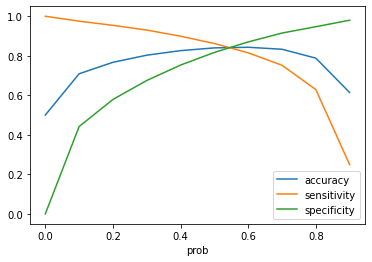

In [292]:
cutoff.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])

In [293]:
_test_percentage = log_alg.predict_proba(x_smt_test)[:,1]
test_churn_predicted = pd.DataFrame({'ChurnProbability': log_alg.predict_proba(x_smt_test)[:,1]})
test_churn_predicted['y_test'] = y_smt_test
test_churn_predicted['0.55_predict'] = test_churn_predicted.ChurnProbability.map(lambda x: 1 if x > 0.55 else 0)
test_churn_predicted.head(20)

,ChurnProbability,y_test,0.55_predict
0,0.840053,0,1
1,0.815816,0,1
2,0.051053,0,0
3,0.151249,0,0
4,0.085099,0,0
5,0.083197,0,0
6,0.915137,0,1
7,0.087380,0,0
8,0.205216,0,0
9,0.945735,1,1


In [294]:
print(metrics.confusion_matrix(test_churn_predicted.y_test, test_churn_predicted['0.55_predict'])) 

[[6956 1276]
 [1126 7106]]


_Accuracy ~ 85%_


In [295]:
_percentage=log_alg.predict_proba(x_smt_test)[:,1]
_percentage

array([0.84005348, 0.81581598, 0.05105302, ..., 0.93272063, 0.84983776,
       0.8900663 ])

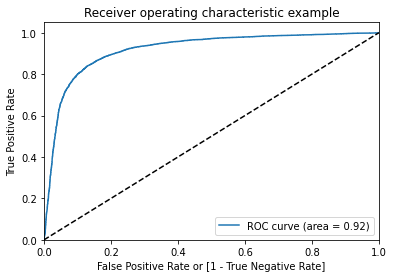

In [296]:
def draw_roc(actual, probability):
    fpr, tpr, thershoulds = metrics.roc_curve(actual, probability, drop_intermediate=False)
    auc = metrics.roc_auc_score(actual, probability)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

# Plot True Positive Rate vs False Positive Rate
draw_roc(y_smt_test,_percentage)

In [297]:
pca_column_frame['sampling_coeff'] = log_alg.coef_[0]
pca_column_frame.iloc[(-np.abs(pca_column_frame['sampling_coeff'].values)).argsort()]

,PC1,PC2,Feature,coeff,sampling_coeff
24,0.004449,0.019844,loc_og_t2c_mou_6,0.585381,0.685348
29,0.201832,0.011375,loc_og_mou_8,0.576178,0.638204
0,0.108035,0.102965,arpu_6,-0.616053,-0.593935
10,0.001886,0.005527,roam_ic_mou_7,-0.538901,-0.568258
60,0.097932,-0.055455,loc_ic_t2f_mou_6,-0.395816,-0.533005
53,0.099769,0.237140,total_og_mou_8,-0.480162,-0.495377
36,0.028381,-0.011988,std_og_t2f_mou_6,-0.312864,-0.399419
32,-0.024311,0.196258,std_og_t2t_mou_8,0.440494,0.377080
76,0.060242,0.046710,std_ic_mou_7,-0.276356,-0.353468
58,0.196105,-0.061809,loc_ic_t2m_mou_7,0.330876,0.353047


### Random Forest with Over Sampling & under sampling:

In [298]:
model_rf= RandomForestClassifier(bootstrap=True,
                                  max_depth=10,
                                  min_samples_leaf=100, 
                                  min_samples_split=200,
                                  n_estimators=1000,
                                  oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_features = 15,
                                  max_leaf_nodes = 30)
model_rf.fit(x_smt_train, y_smt_train)

# Make predictions
prediction_test = model_rf.predict(x_smt_test)

print(classification_report(y_smt_test,prediction_test))
print(confusion_matrix(y_smt_test,prediction_test))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      8232
           1       0.85      0.81      0.83      8232

    accuracy                           0.84     16464
   macro avg       0.84      0.84      0.84     16464
weighted avg       0.84      0.84      0.84     16464

[[7100 1132]
 [1572 6660]]


In [299]:
r_model= RandomForestClassifier()
params= {
    'max_features': range(30, 40, 5),
    'n_estimators': [40],
    'min_samples_leaf': range(100, 150, 25),
    'min_samples_split': range(100, 150, 25),
    'max_depth': [7, 8, 9]
}

folds = KFold(n_splits=2, shuffle=True, random_state=101)
grid_cv1 = GridSearchCV(r_model,
                        param_grid=params,
                        scoring='accuracy',
                        n_jobs=-1,
                        cv=folds,
                        verbose=1,
                        return_train_score=True)
grid_cv1.fit(x_smt_train, y_smt_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  8.1min finished


GridSearchCV(cv=KFold(n_splits=2, random_state=101, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_f...
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
    

In [300]:
results = pd.DataFrame(grid_cv1.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,21.651058,0.004711,0.123811,0.000193,7,30,100,100,40,"{'max_depth': 7, 'max_features': 30, 'min_samp...",0.838661,0.834906,0.836784,0.001877,9,0.850550,0.848516,0.849533,0.001017
1,17.594686,0.055686,0.121809,0.000995,7,30,100,125,40,"{'max_depth': 7, 'max_features': 30, 'min_samp...",0.837201,0.835376,0.836288,0.000913,10,0.849924,0.848881,0.849403,0.000521
2,17.388046,0.041401,0.124634,0.000163,7,30,125,100,40,"{'max_depth': 7, 'max_features': 30, 'min_samp...",0.834959,0.831569,0.833264,0.001695,20,0.844553,0.843145,0.843849,0.000704
3,17.227291,0.028177,0.128408,0.004469,7,30,125,125,40,"{'max_depth': 7, 'max_features': 30, 'min_samp...",0.836054,0.831100,0.833577,0.002477,19,0.844293,0.840173,0.842233,0.002060
4,20.495418,0.062656,0.126761,0.000922,7,35,100,100,40,"{'max_depth': 7, 'max_features': 35, 'min_samp...",0.837409,0.834020,0.835715,0.001695,12,0.849455,0.845179,0.847317,0.002138
5,20.613851,0.038580,0.123079,0.001106,7,35,100,125,40,"{'max_depth': 7, 'max_features': 35, 'min_samp...",0.838452,0.832612,0.835532,0.002920,13,0.848099,0.845283,0.846691,0.001408
6,20.014946,0.033222,0.123822,0.000533,7,35,125,100,40,"{'max_depth': 7, 'max_features': 35, 'min_samp...",0.835636,0.829640,0.832638,0.002998,21,0.847056,0.842103,0.844579,0.002477
7,20.051268,0.054265,0.128029,0.000650,7,35,125,125,40,"{'max_depth': 7, 'max_features': 35, 'min_samp...",0.833811,0.830943,0.832377,0.001434,23,0.842468,0.842311,0.842389,0.000078
8,18.820462,0.014620,0.135066,0.003986,8,30,100,100,40,"{'max_depth': 8, 'max_features': 30, 'min_samp...",0.838504,0.835324,0.836914,0.001590,8,0.850550,0.847526,0.849038,0.001512
9,19.226180,0.029783,0.126154,0.000007,8,30,100,125,40,"{'max_depth': 8, 'max_features': 30, 'min_samp...",0.842624,0.837722,0.840173,0.002451,2,0.853418,0.850498,0.851958,0.001460


In [301]:
grid_cv1.best_params_

{'max_depth': 9,
 'max_features': 30,
 'min_samples_leaf': 100,
 'min_samples_split': 100,
 'n_estimators': 40}

In [302]:
best_estimator = grid_cv1.best_estimator_
best_estimator.fit(x_smt_train, y_smt_train)

# Making predictions
prediction_test = best_estimator.predict(x_smt_test)

print(classification_report(y_smt_test,prediction_test))
print(confusion_matrix(y_smt_test,prediction_test))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      8232
           1       0.86      0.82      0.84      8232

    accuracy                           0.84     16464
   macro avg       0.84      0.84      0.84     16464
weighted avg       0.84      0.84      0.84     16464

[[7116 1116]
 [1488 6744]]


_Observation:_

PCA with Logistic regression has balanced btween specificity and recall

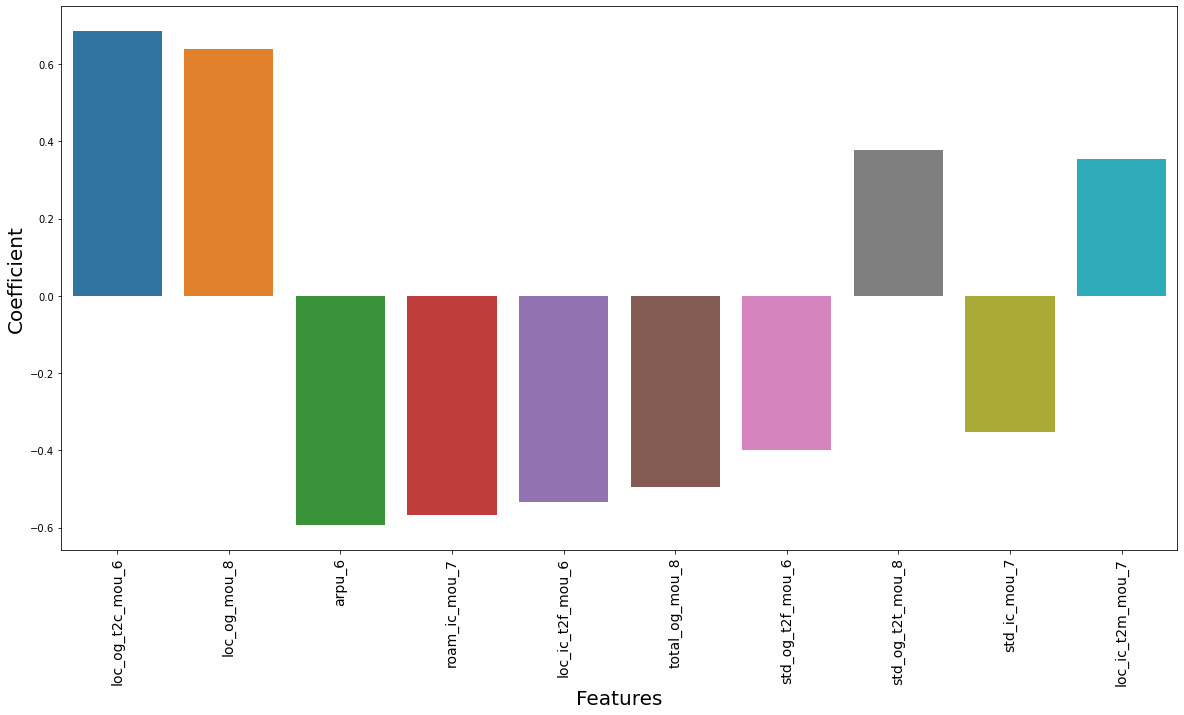

In [303]:
plt.figure(figsize=(20, 10))
top_features = pca_column_frame.iloc[(-np.abs(pca_column_frame['sampling_coeff'].values)).argsort()].head(10)
sns.barplot(x='Feature', y='sampling_coeff', data=top_features)
plt.xlabel('Features',size=20)
plt.ylabel('Coefficient',size=20)
plt.xticks(size = 14, rotation='vertical')
plt.show()

_the top features impacting customer churn:_


LOC_OG_T2C_MOU_6 - Customers call to operator call center during Good Phase


LOC_OG_MOU_8 - Customers local outgoing calls minutes of usage during Action Phase


ARPU_6 - average revenue per user during Good Phase


ROAM_IC_MOU_7 - incoming roaming calls minutes of usage during Action Phase 


LOC_IC_T2F_MOU_6 - local incoming calls to landline to same operator minutes of usage during Good Phase


TOTAL_OG_MOU_8 - Total outgoing minutes of usage during Action Phase


LOC_IC_T2M_MOU_7 - local incoming calls to another operator minutes of usage during Good Phase

STD_OG_T2F_MOU_6 - STD outgoing calls to landline to same operator minutes of usage during Good Phase


STD_OG_T2T_MOU_8 - STD outgoing calls to mobile to same operator minutes of usage during Action Phase

STD_IC_MOU_7 - STD incoming calls minutes of usage during Action Phase 


__Observations:__

The top 10 features that indicate a tendency for a customer to churn from the current network/operator are listed above. 

_Key indicators whether the customer is about to Churn:_

- Frequent calls to the customer care raising issues on the services and enquiring on cheaper plans may be. 

- average revenue per user is decreasing gradually over months 

- Churners may show higher roaming usage than non-churners.

- Customer's is not getting good quality of service while roaming. In this case, provider must focus on to provide good quality of service working with roaming partners.

_Few General Reasons that could factor Churn are-_

- Competitor Network Providers may have attractive deals on the value added services along with reduced tariff.

- Bad service or poor reception of the current provider in the customers home or office area.

- Current provider might need to revise its tariff periodically to be in the market competition

- Network provider must be competitive in terms of technology . For eg: it should be ready for 5G before other providers upgrade their tech. 

_Summary:_

Monitor Drop in Usage of mobile services. The drop in the usage of top services needs to monitored on a month-by-month manner so that the downward statistics can determine if the customer is about to churn. 

New marketing campaigns and provide coupons which targets the customers who tend to churn can be rolled out. Eg: 'additional' discounted roaming rates, free high-speed internet, free calls, free SMS to added extra to what the user pays. And also,
improving the providers services in the city, in the country and abroad. 
Operator should also focus to provide its services internationally for customers who have frequent international trips. 
Marketing team should also identify these high value customer base and try to invite their famility members to their networks with attractive tariff packages, so that these high value customers stays longe with the provider. 

Overall, Logistic Regression performs best by achieving the best recall accuracy for the test data, the overall accuracy and 
specificity is consistent for Test and train data, and avoiding overfitting. It is much closer to predict Churn customers than the other model. 